# **Práctica 2 (25% nota final): Tipologia y ciclo de vida de los datos**

En esta práctica se elabora un caso práctico orientado a aprender a identificar los datos relevantes para un proyecto analítico y usar las herramientas de integración, limpieza, validación y análisis de los mismos. Para realizar esta práctica se requiere trabajar en grupos de dos personas.
La entrega de esta práctica se ha de realizar según lo especificado en el apartado Formato y fecha de entrega. Se debe entregar una memoria PDF con las respuestas a los diferentes apartados, un repositorio con el código fuente y un vídeo explicativo, en el que ambos integrantes del grupo comenten los aspectos más relevantes del proyecto.

## **Competencias**
En esta práctica se desarrollan las siguientes competencias del Máster de Data Science:

● Capacidad de analizar un problema en el nivel de abstracción adecuado a cada situación y aplicar las habilidades y conocimientos adquiridos para abordarlo y resolverlo.  
● Capacidad para aplicar las técnicas específicas de tratamiento de datos (integración, transformación, limpieza y validación) para su posterior análisis.  

## **Objetivos**
Los objetivos concretos de esta práctica son:

● Aprender a aplicar los conocimientos adquiridos y su capacidad de resolución de problemas en entornos nuevos o poco conocidos dentro de contextos más amplios o multidisciplinares.  
● Saber identificar los datos relevantes y los tratamientos necesarios (integración, limpieza y validación) para llevar a cabo un proyecto analítico.  
● Aprender a analizar los datos adecuadamente para abordar la información contenida en los datos.  
● Identificar la mejor representación de los resultados para aportar conclusiones sobre el problema planteado en el proceso analítico.    
● Actuar con los principios éticos y legales relacionados con la manipulación de datos en función del ámbito de aplicación.  
● Desarrollar las habilidades de aprendizaje que les permitan continuar estudiando de un modo que tendrá que ser en gran medida autodirigido o autónomo.  
● Desarrollar la capacidad de búsqueda, gestión y uso de información y recursos en el ámbito de la ciencia de datos.  

## **Descripción de la Práctica a realizar**
El objetivo de esta actividad será el tratamiento del dataset creado en la Práctica 1.
Importante: el dataset debe contar con una amplia variedad de datos numéricos y categóricos, entre los que se encuentre al menos una variable objetivo, así como contar con datos faltantes y/o erróneos, para poder realizar un análisis más rico y poder responder a las diferentes preguntas planteadas en el enunciado de la práctica. De no ser así, se deberá buscar la forma de integrar más datos que cumplan con estos requisitos en la etapa de integración (apartado 2).

Siguiendo las principales etapas de un proyecto analítico, las diferentes tareas a realizar (y justificar) son las siguientes:

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Registro de la Flota Pesquera Española: Características y Distribución**

## **1. Descripción del dataset.**
* ¿Por qué es importante y qué pregunta/problema pretende responder?
* Resume brevemente las variables que lo forman y su tamaño.


In [1]:
# Librerias
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer


In [2]:
data = pd.read_csv("./data/datos_buques_ESP.csv")

In [3]:
data.head(5)

,CFR,Nombre,IMO,IRCS,Matrícula,Alta en RGFP,Estado,Eslora total,Arqueo GT,Potencia,Material del casco,Puerto base,Administración responsable del Registro,Censo por modalidad,Capacidad del buque no aportable por:,Tipo de auxiliar
0,ESP000000001,ARGOÑOS,-,EA7682,3ST-4-2467,10/05/1989,Baja Definitiva (desde el 02/12/1998),"0,00 m","52,70","202,26 kW (275,0 CV)",Madera,"21250 - Vicedo, LUGO (GALICIA)",Secretaría General de Pesca,CERCO EN CANTABRICO NW,NaN,NaN
1,ESP000000002,MARIA INSOLINA,-,EB6932,3ST-4-2181,10/05/1989,Baja Definitiva (desde el 30/06/1990),"10,75 m","0,00","35,30 kW (48,0 CV)",Madera,"13400 - Santander, CANTABRIA",Secretaría General de Pesca,ARTES MENORES EN CANTABRICO NW,NaN,NaN
2,ESP000000003,MOWINKEL II,-,-,3ST-4-2500,10/05/1989,Baja Definitiva (desde el 16/02/2005),"11,25 m","6,76","44,13 kW (60,0 CV)",Madera,43100 - Ceuta,Secretaría General de Pesca,PALANGRE DE FONDO EN CANTABRICO NW,NaN,NaN
3,ESP000000004,JULIA NUMERO TRES,-,-,3ST-4-2281,10/05/1989,Baja Definitiva (desde el 26/08/1994),"0,00 m","0,00","44,13 kW (60,0 CV)",Madera,"13400 - Santander, CANTABRIA",Secretaría General de Pesca,VOLANTA EN CANTABRICO NW,NaN,NaN
4,ESP000000005,SIEMPRE HERMANOS EZQUIAGA,-,EA6583,3ST-4-2540,10/05/1989,Baja Definitiva (desde el 15/11/2006),"19,60 m","40,00","169,16 kW (230,0 CV)",Madera,"12200 - Bermeo, BIZKAIA (PAÍS VASCO)",Secretaría General de Pesca,ARTES MENORES EN CANTABRICO NW,NaN,NaN


## **3. Limpieza de los datos.**



### **3.1. ¿Los datos contienen ceros, elementos vacíos u otros valores numéricos que indiquen la pérdida de datos? Gestiona cada uno de estos casos utilizando el método de imputación que consideres más adecuado.**

* **Revisión de duplicados**

In [4]:
data['CFR'].duplicated().sum()

np.int64(0)

**No hay duplicados en el dataset.**

* **Identificación de valores vacíos y/o nulos**

In [5]:
def resumen_nulos_vacios_y_ceros(data):
    def es_cero(x):
        if pd.isna(x):
            return False
        x_str = str(x).strip().lower()
        match = re.search(r'[\d.,]+', x_str)
        if not match:
            return False
        num = match.group().replace(',', '.')
        try:
            return float(num) == 0.0
        except:
            return False

    resumen = pd.DataFrame({
        'total': data.shape[0],
        'nulos': data.isnull().sum(),
        'vacios': (data == '').sum(),
        'solo_espacios': data.apply(lambda col: col.apply(lambda x: isinstance(x, str) and x.strip() == '')).sum(),
        'solo_caracteres_especiales': data.apply(lambda col: col.apply(lambda x: bool(re.fullmatch(r"[\W_]+", str(x).strip())))).sum(),
        'ceros': data.apply(lambda col: col.apply(es_cero)).sum()
    })
    resumen['total_afectados'] = resumen[['nulos', 'vacios', 'solo_espacios', 'solo_caracteres_especiales', 'ceros']].sum(axis=1)
    return resumen

# Llamar a la función actualizada
resumen_anomalias = resumen_nulos_vacios_y_ceros(data)

# Mostrar resumen ordenado
print(resumen_anomalias.sort_values(by='total_afectados', ascending=False))


                                         total  nulos  vacios  solo_espacios  \
Tipo de auxiliar                         27364  27363       0              0   
Capacidad del buque no aportable por:    27364  27220       0              0   
IMO                                      27364      0       0              0   
IRCS                                     27364      0       0              0   
Potencia                                 27364      0       0              0   
Arqueo GT                                27364      0       0              0   
Censo por modalidad                      27364      1       0              0   
Eslora total                             27364      0       0              0   
Material del casco                       27364      0       0              0   
CFR                                      27364      0       0              0   
Matrícula                                27364      0       0              0   
Nombre                                  

Las columnas con valores problemáticos son `Tipo de auxiliar`, `Capacidad del buque no aportable por:`, `IMO`, `IRCS`, `Censo por modalidad`, `Material del casco`, `Potencia`, `Arqueo GT` y `Eslora total`.   
* La columna `Tipo de auxiliar` está completamente vacía o contiene caracteres especiales, por lo que puede eliminarse directamente.
* `Capacidad del buque no aportable por:` tiene más del 99% de valores nulos, por lo que también puede eliminarse.
* En `IMO` y `IRCS` son dos identificadores del buque que contienen casi en su totalidad (> 80 %) carácteres especiales sin aportar información, por lo que podrían eliminarse. Nos quedaremos con el `CFR` como identificador único del buque.
* `Censo por modalidad` contiene unos 2297 registros con carácteres especiales, en concreto (-) y un valor nulo. Puesto que esta columna será procesada para obtener el arte, dichos registros seran agrupados en una categoría de 'Otros', puesto que un buque debe estar registrado en un censo.
* `Material del casco` muestra muy pocos registros con carácteres especiales y se procedera a su agrupación en una categoría 'Otros'.
* Las columnas `Potencia`, `Arqueo GT` y `Eslora total` muestran entorno a 2000 registros con valor 0, lo cual parece ilógico (un buque no puede tener eslora total de 0 m).

En los siguientes apartados, estos valores serán imputados según el método especificado.


* **Simplificación del nombre de las columnas**


In [6]:
columnas_simplificadas = {
    'CFR': 'cfr',
    'Nombre': 'nombre',
    'Matrícula': 'matricula',
    'Alta en RGFP': 'fc_alta_rgfp',
    'Estado': 'estado',
    'Eslora total': 'eslora_total',
    'Arqueo GT': 'arqueo_gt',
    'Potencia': 'potencia',
    'Material del casco': 'material_casco',
    'Puerto base': 'puerto_base',
    'Administración responsable del Registro': 'admin_registro',
    'Censo por modalidad': 'censo_modalidad',
    'Tipo de auxiliar' : 'tipo_auxiliar',
    'Capacidad del buque no aportable por:' : 'capacidad_no_aportable',
    'Material del casco' : 'material_casco',
    'IMO' : 'IMO',
    'IRCS': 'IRCS'
}

data = data.rename(columns=columnas_simplificadas)

In [7]:
data.columns.tolist()

['cfr',
 'nombre',
 'IMO',
 'IRCS',
 'matricula',
 'fc_alta_rgfp',
 'estado',
 'eslora_total',
 'arqueo_gt',
 'potencia',
 'material_casco',
 'puerto_base',
 'admin_registro',
 'censo_modalidad',
 'capacidad_no_aportable',
 'tipo_auxiliar']

Se han simplificado y estandarizado los nombres de las columnas del dataset pues trae múltiples beneficios: facilita la escritura y lectura del código al eliminar espacios y caracteres especiales, mejora la compatibilidad con bibliotecas y herramientas que no toleran bien nombres complejos, y permite trabajar más eficientemente con funciones automatizadas o en bucles. Además, usar nombres cortos, en minúsculas y con formato consistente (como `snake_case`) mejora la legibilidad, reduce errores y hace que el código sea más limpio, profesional y fácil de mantener, especialmente en proyectos colaborativos como el presente.


### **3.2. Identifica y gestiona adecuadamente el tipo de dato de cada atributo (p.ej. conversión de variables categóricas en factor).**

* **Errores deduciendo el tipo de dato (1)**

Parece que columnas como "Eslora total", "Arqueo GT" y "Potencia" deberían ser numéricas pero están como object.

In [8]:
# Función para limpiar columnas numéricas con texto, unidades y comas
def limpiar_y_convertir_num(col):
    return (
        col.astype(str)  # Asegura que todo sea string
        .str.replace(r'[^\d,.-]', '', regex=True)  # Elimina letras y unidades
        .str.replace(',', '.', regex=False)  # Sustituye comas por puntos como separador decimal
        .replace('', np.nan)  # Reemplaza strings vacíos por NaN
        .astype(float)  # Convierte a float
    )

In [9]:
# Aplicar la limpieza a las columnas indicadas
data['eslora_total'] = limpiar_y_convertir_num(data['eslora_total'])
data['arqueo_gt'] = limpiar_y_convertir_num(data['arqueo_gt'])

# Para 'potencia', primero extraemos solo el número principal (antes de paréntesis o texto)
data['potencia_kw'] = (
    data['potencia']
    .astype(str)
    .str.extract(r'([\d,.]+)')  # Extrae solo el primer número
    [0]
    .str.replace(',', '.', regex=False)
    .astype(float)
)


In [10]:
column_list = ['eslora_total', 'arqueo_gt', 'potencia_kw']
for col_name in column_list:
    print(f"Valores únicos en '{col_name}':")
    print(data[col_name].unique())
    print(f"Tipo de dato: {data[col_name].dtype}")
    print("-" * 20)

Valores únicos en 'eslora_total':
[ 0.   10.75 11.25 ... 75.05 46.85 86.1 ]
Tipo de dato: float64
--------------------
Valores únicos en 'arqueo_gt':
[  52.7     0.      6.76 ... 2498.     57.46 4290.  ]
Tipo de dato: float64
--------------------
Valores únicos en 'potencia_kw':
[ 202.26   35.3    44.13 ... 4000.    261.03  776.  ]
Tipo de dato: float64
--------------------


La limpieza y conversión de las columnas **eslora_total**, **arqueo_gt** y **potencia** fueron necesarias para garantizar una correcta interpretación y análisis de los datos. Originalmente, estas columnas estaban almacenadas como texto (`object`) debido a varias inconsistencias en su formato. Por ejemplo, **eslora_total** y **arqueo_gt** incluían unidades de medida como `'m'` o caracteres no numéricos, y usaban comas `,` como separador decimal en lugar del punto `.` que Python espera para tratar valores numéricos. Esto impedía realizar cálculos o análisis estadísticos directamente.

En el caso de la columna **potencia**, el problema era aún más complejo: contenía información duplicada en diferentes unidades, como `'202,26 kW (275,0 CV)'`, lo que requería extraer y estandarizar los valores en una sola unidad (por ejemplo, kilovatios). Esta conversión fue esencial para permitir análisis consistentes y precisos, como comparaciones o agregaciones. En resumen, la limpieza de estas columnas fue un paso fundamental para transformar datos heterogéneos y mal estructurados en formatos numéricos válidos y útiles para el procesamiento posterior.


* **Errores deduciendo el tipo de dato (2)**

Parece que la columna  "fc_alta_rgfp" deberia ser tipo fecha pero están como object.

In [11]:
# Convertir columna alta_rgfp a datetime
data['fc_alta_rgfp'] = pd.to_datetime(data['fc_alta_rgfp'], dayfirst=True, errors='coerce')

La conversión de la columna **alta_rgfp** a tipo fecha es necesaria porque originalmente los valores estaban almacenados como texto (`object`), lo que impedía aprovechar las funcionalidades específicas que ofrece Python para trabajar con fechas. Este campo representa la **fecha de alta en el Registro General de la Flota Pesquera**, una información temporal clave para análisis cronológicos, cálculos de antigüedad, o filtrado por rangos de fechas.

Sin esta conversión, operaciones como agrupar por año, calcular el tiempo desde el alta o identificar registros más recientes/antiguos no serían posibles o resultarían mucho más complejas e imprecisas. Además, al convertir a tipo `datetime`, se garantiza que los datos sean consistentes, se detecten posibles errores de formato y se integren correctamente en herramientas de análisis temporal.


### **3.3. Normalización semántica de columnas.**

* **Descomposicion de la columna estado en dos: estado_rgfp y fc_estado**

In [12]:
# Extraer estado base (antes del paréntesis) y fecha contenida (si existe)
# Estado principal (sin paréntesis)
data['estado_rgfp'] = data['estado'].str.extract(r'^([^\(]+)').iloc[:, 0].str.strip()

# Extraer fecha en formato dd/mm/yyyy desde la columna estado
data['fc_estado'] = pd.to_datetime(
    data['estado'].str.extract(r'(\d{2}/\d{2}/\d{4})')[0],
    dayfirst=True,
    errors='coerce'
)

La separación de la columna **estado** en dos columnas distintas **estado_rgfp** y **fc_estado** es necesaria para mejorar la claridad, estructura y utilidad de la información contenida en esa variable.

Originalmente, la columna **estado** combinaba dos tipos de datos diferentes:

1. **Una categoría del estado administrativo del buque** (por ejemplo, “Baja Definitiva”), y
2. **Una fecha asociada a ese estado** (por ejemplo, “(desde el 02/12/1998)”).

Esta mezcla dificultaba el análisis automatizado, ya que impedía utilizar la fecha como dato temporal y el estado como una etiqueta categórica independiente. Al separar esta información:

* **estado_rgfp** permite clasificar fácilmente los buques según su situación actual en el registro, habilitando filtros, estadísticas y análisis por categoría (activos, baja definitiva, etc.).
* **fc_estado**, convertida a formato fecha, permite ordenar cronológicamente, calcular antigüedad del estado, o realizar análisis temporales como tendencias de bajas a lo largo del tiempo.

* **Descomposicón de la columna puerto_base en dos 4: codigo_postal, puerto, provincia, comunidad**


In [13]:
# Lista con las provincias españolas
provincias = [
    'A Coruña', 'Álava', 'Albacete', 'Alicante', 'Almería', 'Asturias', 'Ávila', 'Badajoz',
    'Barcelona', 'Burgos', 'Bizkaia', 'Cáceres', 'Cádiz', 'Cantabria', 'Castellón',
    'Ciudad Real', 'Córdoba', 'Cuenca', 'Girona', 'Granada', 'Guadalajara',
    'Gipuzkoa', 'Huelva', 'Huesca', 'Illes balears', 'Jaén', 'La Coruña',
    'La Rioja', 'Las Palmas', 'León', 'Lérida', 'Lugo', 'Madrid', 'Málaga',
    'Murcia', 'Navarra', 'Orense', 'Palencia', 'Pontevedra', 'Salamanca',
    'Santa Cruz de Tenerife', 'Segovia', 'Sevilla', 'Soria', 'Tarragona',
    'Teruel', 'Toledo', 'Valencia', 'Valladolid', 'Vizcaya', 'Zamora', 'Zaragoza',
    'Ceuta', 'Melilla'
]

# Lista con las comnidades autonomas españolas
comunidades_autonomas = [
    'Andalucía', 'Aragón', 'Asturias', 'Illes balears', 'Canarias', 'Cantabria',
    'Castilla-La Mancha', 'Castilla y León', 'Cataluña', 'Comunitat Valenciana',
    'Extremadura', 'Galicia', 'Madrid', 'Murcia', 'Navarra', 'La Rioja',
    'País Vasco', 'Ceuta', 'Melilla'
]


In [14]:
# Función para extraer la información
def extraer_info(puerto_base):
    codigo_postal = None
    puerto = None
    provincia = None
    comunidad = None

    if pd.isna(puerto_base):
        return pd.Series([codigo_postal, puerto, provincia, comunidad])

    # Extraer código postal (primeros 5 dígitos)
    match_cp = re.match(r'(\d{5})\s*-\s*(.*)', puerto_base)
    if match_cp:
        codigo_postal = match_cp.group(1)
        resto = match_cp.group(2).strip()
    else:
        resto = puerto_base.strip()

    # Buscar comunidad y provincia
    comunidad = next((c for c in comunidades_autonomas if c.upper() in resto.upper()), None)
    provincia = next((p for p in provincias if p.upper() in resto.upper()), None)

    # Eliminar contenido entre paréntesis
    resto = re.sub(r'\s*\(.*?\)', '', resto).strip()

    # Extraer el nombre del puerto (antes de la coma, si hay)
    if ',' in resto:
        puerto = resto.split(',')[0].strip()
    else:
        puerto = resto.strip()

    # Casos especiales como Ceuta, Melilla (son ciudad, provincia y CCAA al mismo tiempo)
    if provincia in ['Ceuta', 'Melilla']:
        comunidad = None
        puerto = provincia

    # Si no se encontró provincia pero sí comunidad que coincide con una provincia (ej: Cantabria)
    if not provincia and comunidad in provincias:
        provincia = comunidad

    return pd.Series([codigo_postal, puerto, provincia, comunidad])


In [15]:
data[['Código Postal', 'Puerto', 'Provincia', 'Comunidad Autónoma']] = data['puerto_base'].apply(extraer_info)

En **Puerto base**, varios datos (código postal, puerto, provincia y comunidad autónoma) estaban combinados en una sola cadena. Esto impedía realizar análisis geográficos detallados o agrupar los registros por nivel administrativo. Separar estos elementos en columnas individuales permitió normalizar la información y facilitar operaciones como filtrado, agrupación o visualización por comunidad o provincia.

* **Estandarización de las categorias**

In [16]:
def clasificar_arte(censo):
    if pd.isna(censo) or censo.strip() == '-':
        return 'Desconocido'
    censo = censo.upper()
    if 'ARRASTRE' in censo or 'ARRASTREROS' in censo or 'BACALADEROS' in censo:
        return 'Arrastre'
    elif 'CERCO' in censo or 'CERQUEROS' in censo:
        return 'Cerco'
    elif 'PALANGRE' in censo:
        return 'Palangre'
    elif 'ARTES MENORES' in censo:
        return 'Artes menores'
    elif 'ARTES FIJAS' in censo or 'VOLANTA' in censo or 'RASCO' in censo:
        return 'Artes fijas'
    elif 'CAÑEROS' in censo:
        return 'Cañeros'
    else:
        return 'Otros'


In [17]:
data['Tipo de Arte'] = data['censo_modalidad'].apply(clasificar_arte)


En **Censo por modalidad**, cada valor combinaba el tipo de arte de pesca con la zona de actividad, sin un formato homogéneo. Clasificar estos censos en categorías estandarizadas como "Arrastre", "Palangre", "Cerco", etc., permitió agrupar modalidades distintas bajo criterios comunes, simplificando el análisis técnico y operativo de la flota.


- **Eliminacion de columnas no de interés**

In [18]:
# Lista de columnas a eliminar
columnas_a_eliminar = ['IMO', 'IRCS','matricula', 'estado', 'potencia', 'puerto_base', 'admin_registro', 'censo_modalidad', 'capacidad_no_aportable', 'tipo_auxiliar', 'Código Postal']

# Eliminar las columnas del DataFrame
data_1 = data.drop(columns=columnas_a_eliminar)

In [19]:
data_1.head(3)

,cfr,nombre,fc_alta_rgfp,eslora_total,arqueo_gt,material_casco,potencia_kw,estado_rgfp,fc_estado,Puerto,Provincia,Comunidad Autónoma,Tipo de Arte
0,ESP000000001,ARGOÑOS,1989-05-10,0.00,52.70,Madera,202.26,Baja Definitiva,1998-12-02,Vicedo,Lugo,Galicia,Cerco
1,ESP000000002,MARIA INSOLINA,1989-05-10,10.75,0.00,Madera,35.30,Baja Definitiva,1990-06-30,Santander,Cantabria,Cantabria,Artes menores
2,ESP000000003,MOWINKEL II,1989-05-10,11.25,6.76,Madera,44.13,Baja Definitiva,2005-02-16,Ceuta,Ceuta,None,Palangre


## **3.4 Identificación y gestión de los valores extremos**


* **Imputación de los valores 0 e ilógicos**

In [20]:
# Copiamos el DataFrame para no modificar el original
data_imputed = data_1.copy()

# Columnas numéricas a tratar
numeric_cols = ['eslora_total', 'arqueo_gt', 'potencia_kw']

# Guardamos copia de los datos originales para comparar
original_values = data_1[numeric_cols].copy()

# Paso 1: Reemplazar los 0.00 por NaN
for col in numeric_cols:
    data_imputed[col] = data_imputed[col].replace(0.00, np.nan)

# Contamos cuántos ceros y NaNs había antes
print("Valores cero originales por columna:")
print((original_values == 0.00).sum())
print("Valores NaN originales por columna:")
print(original_values.isna().sum())

# Paso 2: Aplicar KNN Imputer (k=15)
imputer = KNNImputer(n_neighbors=15)

# Solo imputamos las columnas numéricas
data_imputed[numeric_cols] = imputer.fit_transform(data_imputed[numeric_cols])

# Verificamos que ya no hay ceros ni NaNs en esas columnas
print("Valores NaN tras imputación:")
print(data_imputed[numeric_cols].isna().sum())
print("Valores cero tras imputación:")
print((data_imputed[numeric_cols] == 0.00).sum())

# Comparación estadística antes y después
for col in numeric_cols:
    print(f"\nColumna: {col}")
    print(f" - Media original (excluyendo ceros y NaNs): {original_values[col][original_values[col] != 0].dropna().mean():.3f}")
    print(f" - Media imputada: {data_imputed[col].mean():.3f}")
    print(f" - Mediana original (excluyendo ceros y NaNs): {original_values[col][original_values[col] != 0].dropna().median():.3f}")
    print(f" - Mediana imputada: {data_imputed[col].median():.3f}")
    print(f" - Desviación estándar original (excluyendo ceros y NaNs): {original_values[col][original_values[col] != 0].dropna().std():.3f}")
    print(f" - Desviación estándar imputada: {data_imputed[col].std():.3f}")


Valores cero originales por columna:
eslora_total    1986
arqueo_gt       2474
potencia_kw     2718
dtype: int64
Valores NaN originales por columna:
eslora_total    0
arqueo_gt       0
potencia_kw     0
dtype: int64
Valores NaN tras imputación:
eslora_total    0
arqueo_gt       0
potencia_kw     0
dtype: int64
Valores cero tras imputación:
eslora_total    0
arqueo_gt       0
potencia_kw     0
dtype: int64

Columna: eslora_total
 - Media original (excluyendo ceros y NaNs): 11.481
 - Media imputada: 11.501
 - Mediana original (excluyendo ceros y NaNs): 7.500
 - Mediana imputada: 7.600
 - Desviación estándar original (excluyendo ceros y NaNs): 9.986
 - Desviación estándar imputada: 9.855

Columna: arqueo_gt
 - Media original (excluyendo ceros y NaNs): 44.236
 - Media imputada: 45.457
 - Mediana original (excluyendo ceros y NaNs): 2.100
 - Mediana imputada: 2.300
 - Desviación estándar original (excluyendo ceros y NaNs): 180.621
 - Desviación estándar imputada: 179.324

Columna: potencia_k

Se ha realizado una imputación en las variables numéricas que contienen valores cero, reemplazándolos por valores nulos, ya que un buque no puede tener eslora 0 m, arqueo 0 toneladas o potencia 0 kW; estos ceros probablemente se deben a la antigüedad de los datos y a limitaciones en la recolección original. Para la imputación utilizamos el **método de los k vecinos más cercanos con k=15**, lo que nos brinda mayor robustez frente a valores atípicos.

Optamos por k=15 porque con un número bajo de vecinos, como 3, la imputación puede distorsionarse si alguno de esos vecinos es un outlier. Al aumentar a 15 vecinos, el impacto de valores atípicos se diluye al promediar más observaciones, captando mejor la tendencia general y suavizando la variabilidad extrema. Además, dado que contamos con más de 27,000 registros, este valor de k es razonable y evita sesgos o sobreajustes.

Tras la imputación, los valores cero y NaN desaparecieron por completo en las columnas tratadas, y las estadísticas descriptivas muestran que las medias, medianas y desviaciones estándar **se mantienen muy similares antes y después**, salvo en potencia_kw, donde la imputación suavizó la distribución. Esto confirma que el método preserva los patrones multidimensionales y la estructura latente del dataset, logrando imputaciones consistentes y realistas dentro del contexto general.


* **Identificacion de valores atípicos (outliers)**

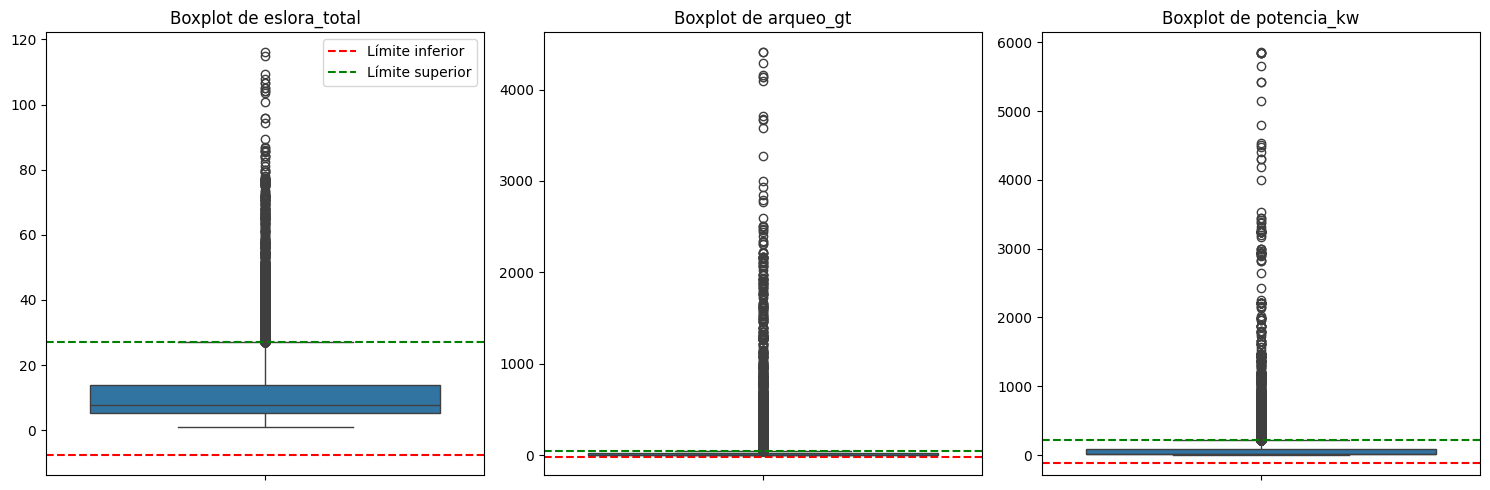

In [21]:
# Selección de columnas numéricas
numeric_cols = ['eslora_total', 'arqueo_gt', 'potencia_kw']

# Crear una figura con subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_cols), figsize=(15, 5))

# Crear un boxplot para cada variable con líneas del IQR
for i, col in enumerate(numeric_cols):
    # Calcular los cuartiles y el IQR
    Q1 = data_imputed[col].quantile(0.25)
    Q3 = data_imputed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Crear boxplot
    sns.boxplot(y=data_imputed[col], ax=axes[i])
    axes[i].axhline(lower_bound, color='red', linestyle='--', label='Límite inferior')
    axes[i].axhline(upper_bound, color='green', linestyle='--', label='Límite superior')
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

    # Añadir leyenda solo al primer gráfico
    if i == 0:
        axes[i].legend()

plt.tight_layout()
plt.show()




## **EXPLICACION DE POR QUE SALEN TANTOS OULIERS, Y POR QUE NO SON UN ERROR**



* **Revisión de las distribuciones en columnas numéricas**

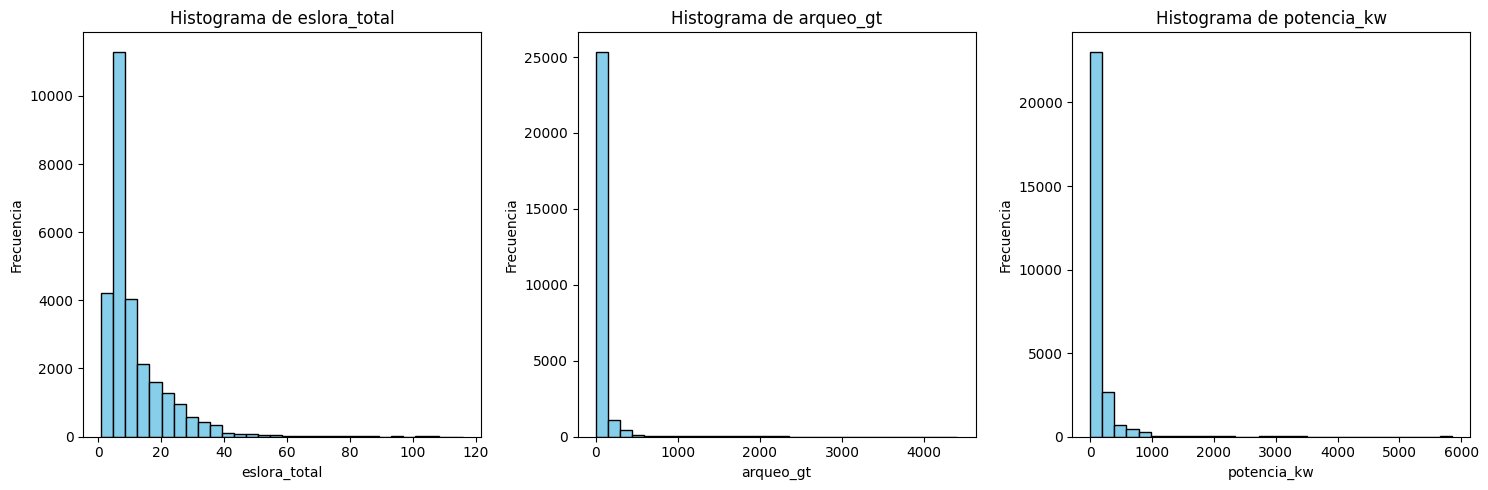

In [22]:
# Selección de columnas numéricas
numeric_cols = ['eslora_total', 'arqueo_gt', 'potencia_kw']

# Crear histogramas para cada variable
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_cols), figsize=(15, 5))

for i, col in enumerate(numeric_cols):
    axes[i].hist(data_imputed[col], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


## **3.4. Correlaciones**


              eslora_total  arqueo_gt  potencia_kw
eslora_total      1.000000   0.799462     0.870160
arqueo_gt         0.799462   1.000000     0.940737
potencia_kw       0.870160   0.940737     1.000000


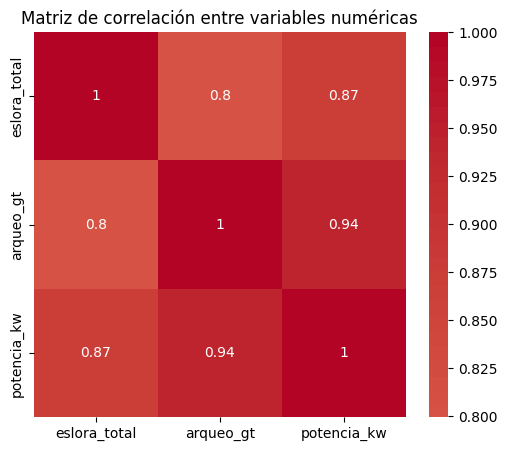

In [23]:
# Seleccionamos las columnas numéricas para la correlación
numeric_cols = ['eslora_total', 'arqueo_gt', 'potencia_kw']

# Calculamos la matriz de correlación (Pearson por defecto)
corr_matrix = data_imputed[numeric_cols].corr()

# Mostramos la matriz
print(corr_matrix)

# Visualizamos con un heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

La matriz de correlación muestra relaciones fuertes y positivas entre las tres variables numéricas analizadas:

* **Eslora total y arqueo_gt** tienen una correlación de aproximadamente **0.80**, lo que indica que a medida que aumenta la eslora (longitud) del buque, también tiende a aumentar su arqueo (tonelaje). Esto es esperable porque barcos más largos suelen tener mayor capacidad o peso.

* **Eslora total y potencia_kw** presentan una correlación aún más alta, alrededor de **0.87**, lo que sugiere que buques más largos también suelen contar con motores de mayor potencia, reflejando la necesidad de impulsar embarcaciones de mayor tamaño.

* La relación entre **arqueo_gt y potencia_kw** es la más fuerte, con un valor de **0.94**, lo que indica que el peso o volumen del buque está muy ligado a la potencia instalada. Esto es coherente, pues un mayor arqueo implica barcos más pesados que requieren motores más potentes para su operación eficiente.

En conjunto, estas correlaciones confirman que las variables están estrechamente relacionadas y reflejan dimensiones físicas y de rendimiento del buque que crecen conjuntamente. Esta consistencia también respalda la calidad de la imputación, ya que mantiene las relaciones naturales esperadas entre estas características.


In [24]:
# Guardar el dataframe resultante
data_imputed.to_csv("./data/data_clean_v2.csv", index= False)

## 4. Análisis de los datos.
### 4.1. Aplica un modelo supervisado y uno no supervisado a los datos y comenta los resultados obtenidos.
### 4.2. Aplica una prueba por contraste de hipótesis. Ten en cuenta que algunas de estas pruebas requieren verificar previamente la normalidad y homocedasticidad de los datos.

## 5. Representación de los resultados a partir de tablas y gráficas. Este apartado se puede responder a lo largo de la práctica, sin necesidad de concentrar todas las representaciones en este apartado. Se debe representar tanto el contenido del dataset para observar las proporciones y distribuciones de las diferentes variables una vez aplicada la etapa de limpieza, como los resultados obtenidos tras la etapa de análisis.

## 6. Resolución del problema. A partir de los resultados obtenidos, ¿cuáles son las conclusiones? ¿Los resultados permiten responder al problema?


## 7. Código. Hay que adjuntar el código, preferiblemente en R, con el que se ha realizado la limpieza, análisis y representación de los datos. Si lo preferís, también podéis trabajar en Python.


## 8. Vídeo. Realizar un breve vídeo explicativo de la práctica (máximo 10 minutos), donde ambos integrantes del equipo expliquen con sus propias palabras el desarrollo de la práctica, basándose en las preguntas del enunciado para justificar y explicar el código desarrollado. Este vídeo se deberá entregar a través de un enlace al Google Drive de la UOC (https://drive.google.com/…), junto con enlace al repositorio Git entregado.